# Generating Plots for the Paper

In [3]:
kwargs = {
    'sym' : '',
    'whis' : [5,95]
}

figures_dir = '/Users/peterwills/google-drive/Research/Graph Distance Study/metrics_paper/figures'

save_figs = True # turn off to not save figures

labels = ['Edit', 'Resistance', 'DeltaCon', 'NetSimile', 'Lambda (A)',
          'Lambda (L)', 'Lambda (NL)']

lambda_labels = (['$\lambda(A)$, k = {}'.format(i) for i in [1,2,5,10,20]] + 
                 ['$\lambda(L)$, k = {}'.format(i) for i in [2,5,10,20]] + 
                 ['$\lambda(NL)$, k = {}'.format(i) for i in [2,5,10,20]])

num_labels = [1,2,5,10,20,2,5,10,20,2,5,10,20]

## Stochastic Blockmodel

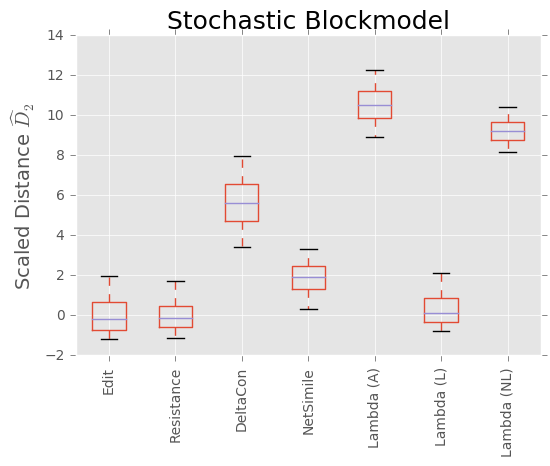

In [2]:
data_dict = pd.read_pickle('pickled_data/er_to_sbm_corr.p')

adj_null = data_dict['results_df_null']['Adjacency Distances'].T
adj_not = data_dict['results_df_not_null']['Adjacency Distances'].T

for item in [adj_null,adj_not]:
    item.index = range(item.shape[0])

adj_scaled = (adj_not - adj_null.mean())/adj_null.std()

plt.figure(figsize=(6,4))
adj_scaled.boxplot(**kwargs);
plt.ylabel('Scaled Distance $\widehat{D}_2$');
plt.xticks(range(1,len(labels)+1),labels,rotation=90);
plt.title('Stochastic Blockmodel');

if save_figs:
    fig = plt.gcf();
    fig.savefig(os.path.join(figures_dir,'sbm_k.pdf'),dpi=300,bbox_inches='tight');

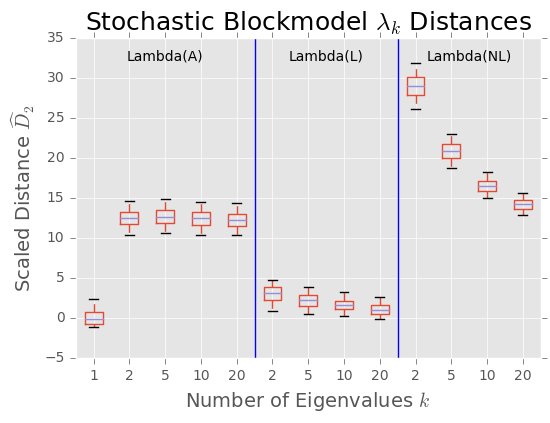

In [3]:
data_dict = pd.read_pickle('pickled_data/er_to_sbm_lambda_k.p')

adj_null = data_dict['results_df_null']['Adjacency Distances'].T
adj_not = data_dict['results_df_not_null']['Adjacency Distances'].T

for item in [adj_null,adj_not]:
    item.index = range(item.shape[0])

adj_scaled = (adj_not - adj_null.mean())/adj_null.std()

indices = list(range(0,15,3)) + list(range(1,15,3)) + list(range(2,15,3))
adj_scaled = adj_scaled.iloc[:,indices]
del adj_scaled['Lambda (Laplacian, k=1)']
del adj_scaled['Lambda (Normalized Laplacian, k=1)']

plt.figure(figsize=(6,4))
adj_scaled.boxplot(**kwargs);
plt.ylabel('Scaled Distance $\widehat{D}_2$');
plt.xlabel('Number of Eigenvalues $k$')
plt.xticks(range(1,len(num_labels)+1),num_labels);
plt.title('Stochastic Blockmodel $\lambda_k$ Distances');
plt.axvline(5.5);
plt.axvline(9.5);

axes = plt.gca()
y_min,y_max = axes.get_ylim()
y_ran = y_max - y_min
shift = -0.07

plt.text(3,y_max + shift*y_ran,'Lambda(A)',horizontalalignment='center')
plt.text(7.5,y_max + shift*y_ran,'Lambda(L)',horizontalalignment='center')
plt.text(11.5,y_max + shift*y_ran,'Lambda(NL)',horizontalalignment='center')

if save_figs:
    fig = plt.gcf();
    fig.savefig(os.path.join(figures_dir,'sbm_k.pdf'),dpi=300,bbox_inches='tight');

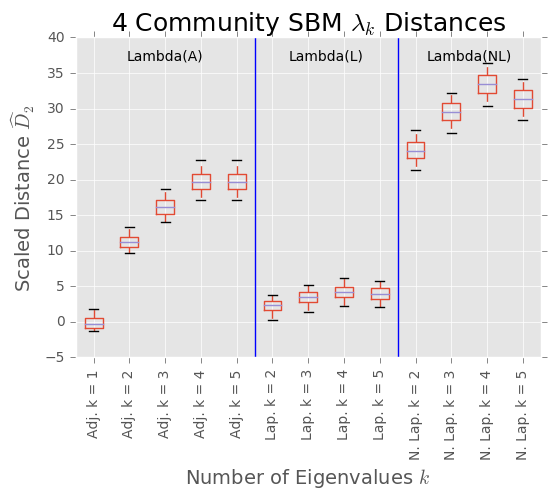

In [33]:
data_dict = pd.read_pickle('pickled_data/er_to_sbm_lambda_k_l4_01.p')

adj_null = data_dict['results_df_null']['Adjacency Distances'].T
adj_not = data_dict['results_df_not_null']['Adjacency Distances'].T

for item in [adj_null,adj_not]:
    item.index = range(item.shape[0])

adj_scaled = (adj_not - adj_null.mean())/adj_null.std()

indices = list(range(0,15,3)) + list(range(1,15,3)) + list(range(2,15,3))
adj_scaled = adj_scaled.iloc[:,indices]
del adj_scaled['Lap. k = 1']
del adj_scaled['N. Lap. k = 1']

plt.figure(figsize=(6,4))
adj_scaled.boxplot(**kwargs);
plt.ylabel('Scaled Distance $\widehat{D}_2$');
plt.xlabel('Number of Eigenvalues $k$')
plt.title('4 Community SBM $\lambda_k$ Distances')
# plt.xticks(range(1,len(num_labels)+1),num_labels);
plt.xticks(rotation=90)

# plt.ylim([-2,11])

plt.axvline(5.5);
plt.axvline(9.5);

axes = plt.gca()
y_min,y_max = axes.get_ylim()
y_ran = y_max - y_min
shift = -0.07

plt.text(3,y_max + shift*y_ran,'Lambda(A)',horizontalalignment='center')
plt.text(7.5,y_max + shift*y_ran,'Lambda(L)',horizontalalignment='center')
plt.text(11.5,y_max + shift*y_ran,'Lambda(NL)',horizontalalignment='center')

if save_figs:
    fig = plt.gcf();
#     fig.savefig(os.path.join(figures_dir,'pref_att_k.pdf'),dpi=300,bbox_inches='tight');

I'm putting this one in here to make sure that my $\lambda_k$ distances are working like I'd expect. I think they are, based on this. I'll rework this plot if I plan on putting it in the paper.

## Preferential Attachment

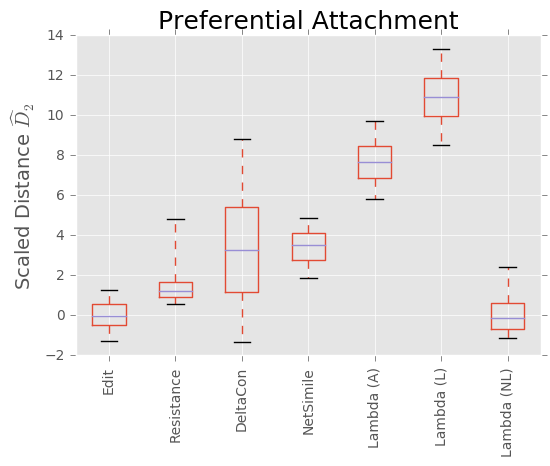

In [6]:
data_dict = pd.read_pickle('pickled_data/er_to_ba_corr.p')

adj_null = data_dict['results_df_null']['Adjacency Distances'].T
adj_not = data_dict['results_df_not_null']['Adjacency Distances'].T

for item in [adj_null,adj_not]:
    item.index = range(item.shape[0])

adj_scaled = (adj_not - adj_null.mean())/adj_null.std()

plt.figure(figsize=(6,4))
adj_scaled.boxplot(**kwargs);
plt.ylabel('Scaled Distance $\widehat{D}_2$');
plt.xticks(range(1,len(labels)+1),labels,rotation=90);
plt.title('Preferential Attachment');

if save_figs:
    fig = plt.gcf();
    fig.savefig(os.path.join(figures_dir,'pref_att.pdf'),dpi=300,bbox_inches='tight');

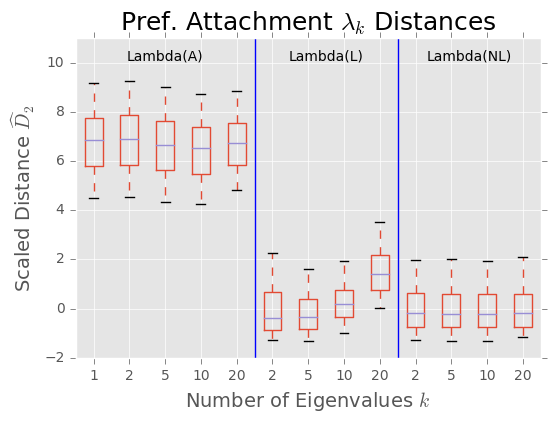

In [23]:
data_dict = pd.read_pickle('pickled_data/er_to_ba_lambda_k.p')

adj_null = data_dict['results_df_null']['Adjacency Distances'].T
adj_not = data_dict['results_df_not_null']['Adjacency Distances'].T

for item in [adj_null,adj_not]:
    item.index = range(item.shape[0])

adj_scaled = (adj_not - adj_null.mean())/adj_null.std()

indices = list(range(0,15,3)) + list(range(1,15,3)) + list(range(2,15,3))
adj_scaled = adj_scaled.iloc[:,indices]
del adj_scaled['Lambda (Laplacian, k=1)']
del adj_scaled['Lambda (Normalized Laplacian, k=1)']

plt.figure(figsize=(6,4))
adj_scaled.boxplot(**kwargs);
plt.ylabel('Scaled Distance $\widehat{D}_2$');
plt.xlabel('Number of Eigenvalues $k$')
plt.title('Pref. Attachment $\lambda_k$ Distances')
plt.xticks(range(1,len(num_labels)+1),num_labels);

plt.ylim([-2,11])

plt.axvline(5.5);
plt.axvline(9.5);

axes = plt.gca()
y_min,y_max = axes.get_ylim()
y_ran = y_max - y_min
shift = -0.07

plt.text(3,y_max + shift*y_ran,'Lambda(A)',horizontalalignment='center')
plt.text(7.5,y_max + shift*y_ran,'Lambda(L)',horizontalalignment='center')
plt.text(11.5,y_max + shift*y_ran,'Lambda(NL)',horizontalalignment='center')

if save_figs:
    fig = plt.gcf();
    fig.savefig(os.path.join(figures_dir,'pref_att_k.pdf'),dpi=300,bbox_inches='tight');

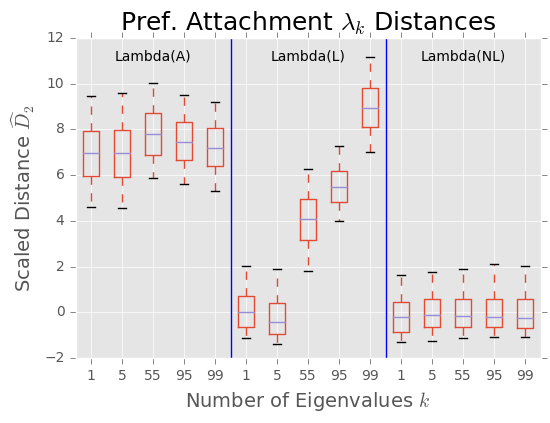

In [24]:
data_dict = pd.read_pickle('pickled_data/er_to_ba_lambda_k_big_k.p')

adj_null = data_dict['results_df_null']['Adjacency Distances'].T
adj_not = data_dict['results_df_not_null']['Adjacency Distances'].T

for item in [adj_null,adj_not]:
    item.index = range(item.shape[0])

adj_scaled = (adj_not - adj_null.mean())/adj_null.std()

indices = list(range(0,15,3)) + list(range(1,15,3)) + list(range(2,15,3))
adj_scaled = adj_scaled.iloc[:,indices]

big_num_labels = [1,5,55,95,99] * 3

plt.figure(figsize=(6,4))
adj_scaled.boxplot(**kwargs);
plt.ylabel('Scaled Distance $\widehat{D}_2$');
plt.xlabel('Number of Eigenvalues $k$')
plt.title('Pref. Attachment $\lambda_k$ Distances')
plt.xticks(range(1,len(big_num_labels)+1),big_num_labels);

plt.ylim([-2,12])

plt.axvline(5.5);
plt.axvline(10.5);

axes = plt.gca()
y_min,y_max = axes.get_ylim()
y_ran = y_max - y_min
shift = -0.07

plt.text(3,y_max + shift*y_ran,'Lambda(A)',horizontalalignment='center')
plt.text(8,y_max + shift*y_ran,'Lambda(L)',horizontalalignment='center')
plt.text(13,y_max + shift*y_ran,'Lambda(NL)',horizontalalignment='center')

if save_figs:
    fig = plt.gcf();
    fig.savefig(os.path.join(figures_dir,'pref_att_big_k.pdf'),dpi=300,bbox_inches='tight');

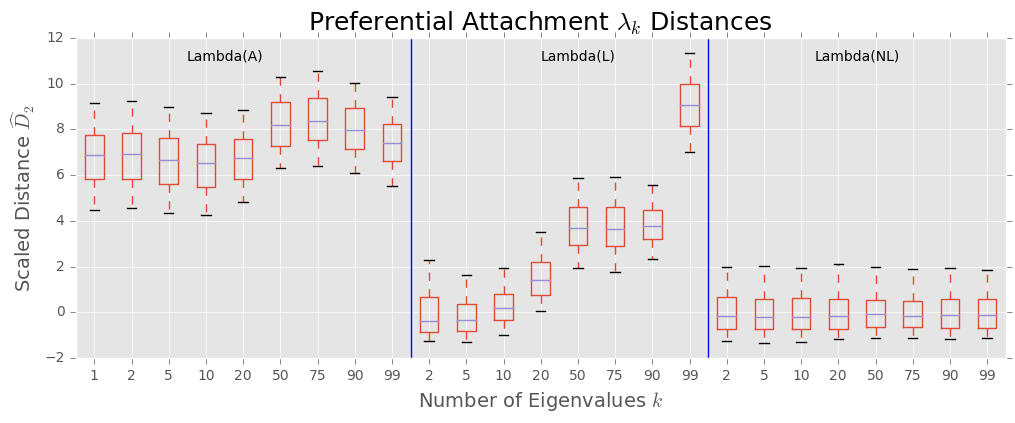

In [73]:
# data for small k

data_dict = pd.read_pickle('pickled_data/er_to_ba_lambda_k.p')

adj_null = data_dict['results_df_null']['Adjacency Distances'].T
adj_not = data_dict['results_df_not_null']['Adjacency Distances'].T

for item in [adj_null,adj_not]:
    item.index = range(item.shape[0])

adj_scaled = (adj_not - adj_null.mean())/adj_null.std()

# data for big k

data_dict = pd.read_pickle('pickled_data/er_to_ba_bigk.p')

adj_null = data_dict['results_df_null']['Adjacency Distances'].T
adj_not = data_dict['results_df_not_null']['Adjacency Distances'].T

for item in [adj_null,adj_not]:
    item.index = range(item.shape[0])
    

# UNITE THEM

adj_scaled_2 = (adj_not - adj_null.mean())/adj_null.std()
adj_scaled = pd.concat([adj_scaled,adj_scaled_2],axis=1)

N = adj_scaled.shape[1]

indices = list(range(0,N,3)) + list(range(1,N,3)) + list(range(2,N,3))
adj_scaled = adj_scaled.iloc[:,indices]

for col in ['Lambda (Laplacian, k=1)','Lambda (Normalized Laplacian, k=1)']:
    del adj_scaled[col]

big_num_labels = [1,2,5,10,20,50,75,90,99] + [2,5,10,20,50,75,90,99]*2

plt.figure(figsize=(12,4))
adj_scaled.boxplot(**kwargs);
plt.ylabel('Scaled Distance $\widehat{D}_2$');
plt.xlabel('Number of Eigenvalues $k$')
plt.xticks(range(1,len(big_num_labels)+1),big_num_labels);
plt.title('Preferential Attachment $\lambda_k$ Distances');
plt.axvline(9.5);
plt.axvline(17.5);

axes = plt.gca()
y_min,y_max = axes.get_ylim()
y_ran = y_max - y_min
shift = -0.07

plt.text(4.5,y_max + shift*y_ran,'Lambda(A)',horizontalalignment='center')
plt.text(14,y_max + shift*y_ran,'Lambda(L)',horizontalalignment='center')
plt.text(21.5,y_max + shift*y_ran,'Lambda(NL)',horizontalalignment='center')

if save_figs:
    fig = plt.gcf();
    fig.savefig(os.path.join(figures_dir,'pref_att_k.pdf'),dpi=300,bbox_inches='tight');

# Pref Attachment vs Random Degree Distribution

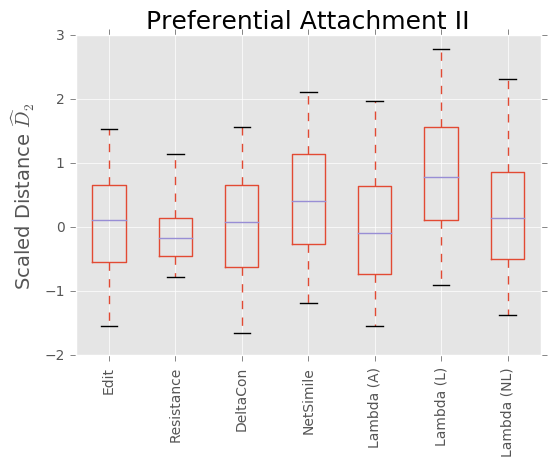

In [4]:
data_dict = pd.read_pickle('pickled_data/degmatched_PA.p')

adj_null = data_dict['results_df_null']['Adjacency Distances'].T
adj_not = data_dict['results_df_not_null']['Adjacency Distances'].T

for item in [adj_null,adj_not]:
    item.index = range(item.shape[0])

adj_scaled = (adj_not - adj_null.mean())/adj_null.std()

plt.figure(figsize=(6,4))
adj_scaled.boxplot(**kwargs);
plt.ylabel('Scaled Distance $\widehat{D}_2$');
plt.xticks(range(1,len(labels)+1),labels,rotation=90);
plt.title('Preferential Attachment II');

if save_figs:
    fig = plt.gcf();
    fig.savefig(os.path.join(figures_dir,'degmatched_pa.pdf'),dpi=300,bbox_inches='tight');

# Small World

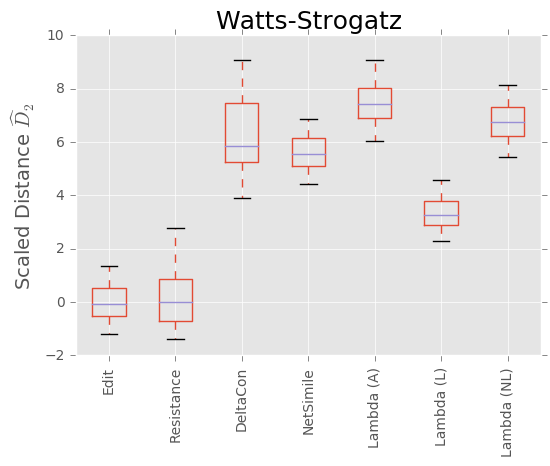

In [40]:
data_dict = pd.read_pickle('pickled_data/small_world_ER_corr.p')

adj_null = data_dict['results_df_null']['Adjacency Distances'].T
adj_not = data_dict['results_df_not_null']['Adjacency Distances'].T

for item in [adj_null,adj_not]:
    item.index = range(item.shape[0])

adj_scaled = (adj_not - adj_null.mean())/adj_null.std()

plt.figure(figsize=(6,4))
adj_scaled.boxplot(**kwargs);
plt.ylabel('Scaled Distance $\widehat{D}_2$');
plt.xticks(range(1,len(labels)+1),labels,rotation=90);
plt.title('Watts-Strogatz');

if save_figs:
    fig = plt.gcf();
    fig.savefig(os.path.join(figures_dir,'small_world.pdf'),dpi=300,bbox_inches='tight');

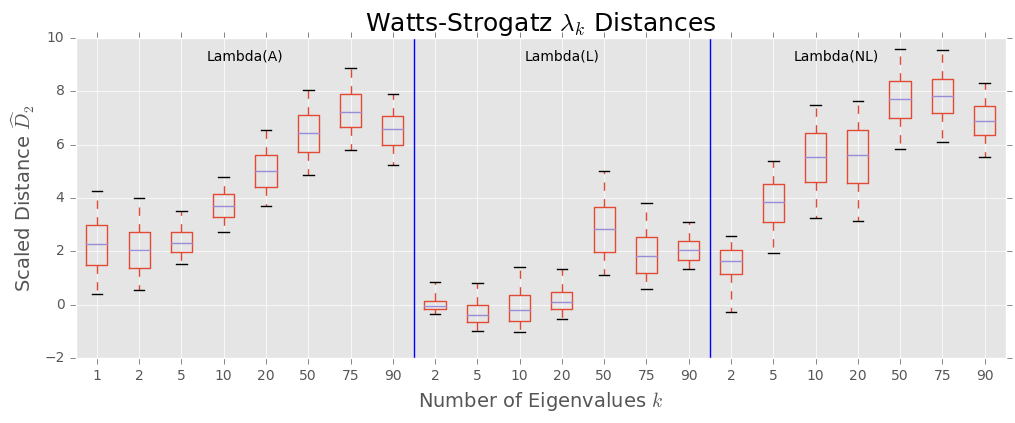

In [39]:
# data for small k

data_dict = pd.read_pickle('pickled_data/small_world_ER_lambda_k.p')

adj_null = data_dict['results_df_null']['Adjacency Distances'].T
adj_not = data_dict['results_df_not_null']['Adjacency Distances'].T

for item in [adj_null,adj_not]:
    item.index = range(item.shape[0])

adj_scaled = (adj_not - adj_null.mean())/adj_null.std()

# data for big k

data_dict = pd.read_pickle('pickled_data/small_world_ER_lambda_k_bigk.p')

adj_null = data_dict['results_df_null']['Adjacency Distances'].T
adj_not = data_dict['results_df_not_null']['Adjacency Distances'].T

for item in [adj_null,adj_not]:
    item.index = range(item.shape[0])
    
# UNITE THEM

adj_scaled_2 = (adj_not - adj_null.mean())/adj_null.std()
adj_scaled = pd.concat([adj_scaled,adj_scaled_2],axis=1)

# and get rid of the ones we don't want

cols_of_interest = ['Adj. k = 1', 'Adj. k = 2', 'Adj. k = 5',
       'Adj. k = 10', 'Adj. k = 20', 'Adj. k = 50', 'Adj. k = 75',
       'Adj. k = 90', 'Lap. k = 2',
       'Lap. k = 5', 'Lap. k = 10', 'Lap. k = 20', 'Lap. k = 50',
       'Lap. k = 75', 'Lap. k = 90', 'N. Lap. k = 2',
       'N. Lap. k = 5', 'N. Lap. k = 10',
       'N. Lap. k = 20', 'N. Lap. k = 50', 'N. Lap. k = 75', 'N. Lap. k = 90']

N = adj_scaled.shape[1]

indices = list(range(0,N,3)) + list(range(1,N,3)) + list(range(2,N,3))
adj_scaled = adj_scaled.iloc[:,indices]
adj_scaled = adj_scaled[cols_of_interest]

big_num_labels = [1,2,5,10,20,50,75,90] + [2,5,10,20,50,75,90]*2

plt.figure(figsize=(12,4))
adj_scaled.boxplot(**kwargs);
plt.ylabel('Scaled Distance $\widehat{D}_2$');
plt.xlabel('Number of Eigenvalues $k$')
plt.xticks(range(1,len(big_num_labels)+1),big_num_labels);
plt.title('Watts-Strogatz $\lambda_k$ Distances');
plt.axvline(8.5);
plt.axvline(15.5);

axes = plt.gca()
y_min,y_max = axes.get_ylim()
y_ran = y_max - y_min
shift = -0.07

plt.text(4.5,y_max + shift*y_ran,'Lambda(A)',horizontalalignment='center')
plt.text(12,y_max + shift*y_ran,'Lambda(L)',horizontalalignment='center')
plt.text(18.5,y_max + shift*y_ran,'Lambda(NL)',horizontalalignment='center')

if save_figs:
    fig = plt.gcf();
    fig.savefig(os.path.join(figures_dir,'small_world_k.pdf'),dpi=300,bbox_inches='tight');

# Lattics vs Random Degree-Distr Graph

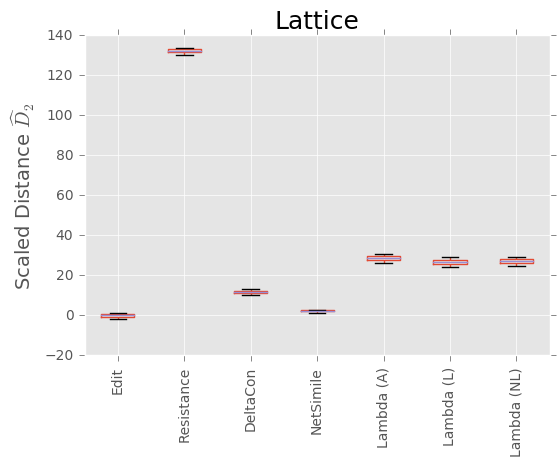

In [41]:
data_dict = pd.read_pickle('pickled_data/lattice_dist.p')

adj_null = data_dict['results_df_null']['Adjacency Distances'].T
adj_not = data_dict['results_df_not_null']['Adjacency Distances'].T

for item in [adj_null,adj_not]:
    item.index = range(item.shape[0])

adj_scaled = (adj_not - adj_null.mean())/adj_null.std()

plt.figure(figsize=(6,4))
adj_scaled.boxplot(**kwargs);
plt.ylabel('Scaled Distance $\widehat{D}_2$');
plt.xticks(range(1,len(labels)+1),labels,rotation=90);
plt.title('Lattice');

if save_figs:
    fig = plt.gcf();
    fig.savefig(os.path.join(figures_dir,'lattice.pdf'),dpi=300,bbox_inches='tight');

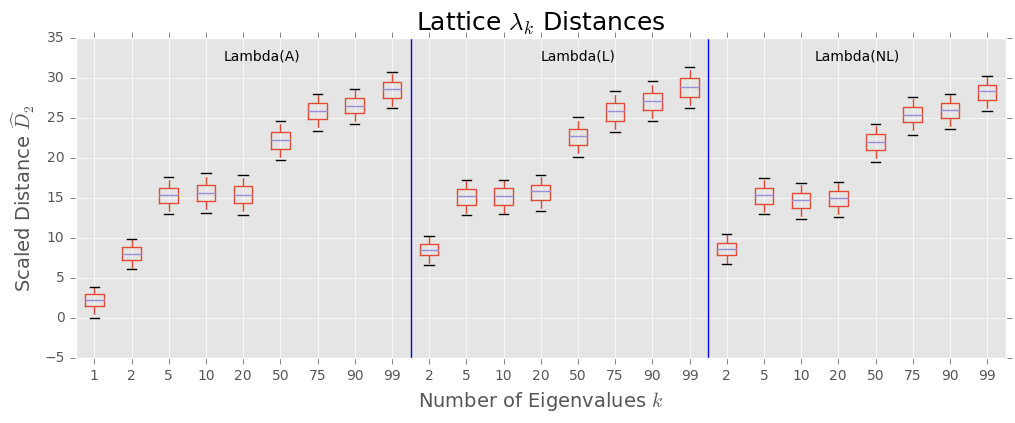

In [63]:
# data for small k

data_dict = pd.read_pickle('pickled_data/lattice_lambda_k.p')

adj_null = data_dict['results_df_null']['Adjacency Distances'].T
adj_not = data_dict['results_df_not_null']['Adjacency Distances'].T

for item in [adj_null,adj_not]:
    item.index = range(item.shape[0])

adj_scaled = (adj_not - adj_null.mean())/adj_null.std()

# data for big k

data_dict = pd.read_pickle('pickled_data/lattice_square_bigk.p')

adj_null = data_dict['results_df_null']['Adjacency Distances'].T
adj_not = data_dict['results_df_not_null']['Adjacency Distances'].T

for item in [adj_null,adj_not]:
    item.index = range(item.shape[0])
    
# UNITE THEM

adj_scaled_2 = (adj_not - adj_null.mean())/adj_null.std()
adj_scaled = pd.concat([adj_scaled,adj_scaled_2],axis=1)

# and get rid of the ones we don't want

cols_of_interest = ['Lambda (Adjacency, k=1)', 'Lambda (Adjacency, k=2)',
                   'Lambda (Adjacency, k=5)', 'Lambda (Adjacency, k=10)',
                   'Lambda (Adjacency, k=20)', 'Adj. k = 50', 'Adj. k = 75', 'Adj. k = 90',
                   'Adj. k = 99', 'Lambda (Laplacian, k=2)',
                   'Lambda (Laplacian, k=5)', 'Lambda (Laplacian, k=10)',
                   'Lambda (Laplacian, k=20)', 'Lap. k = 50', 'Lap. k = 75', 'Lap. k = 90',
                   'Lap. k = 99',
                   'Lambda (Normalized Laplacian, k=2)',
                   'Lambda (Normalized Laplacian, k=5)',
                   'Lambda (Normalized Laplacian, k=10)',
                   'Lambda (Normalized Laplacian, k=20)', 'N. Lap. k = 50',
                   'N. Lap. k = 75', 'N. Lap. k = 90', 'N. Lap. k = 99']

N = adj_scaled.shape[1]

indices = list(range(0,N,3)) + list(range(1,N,3)) + list(range(2,N,3))
adj_scaled = adj_scaled.iloc[:,indices]
adj_scaled = adj_scaled[cols_of_interest]

big_num_labels = [1,2,5,10,20,50,75,90,99] + [2,5,10,20,50,75,90,99]*2

plt.figure(figsize=(12,4))
adj_scaled.boxplot(**kwargs);
plt.ylabel('Scaled Distance $\widehat{D}_2$');
plt.xlabel('Number of Eigenvalues $k$')
plt.xticks(range(1,len(big_num_labels)+1),big_num_labels);
plt.title('Lattice $\lambda_k$ Distances');
plt.axvline(9.5);
plt.axvline(17.5);

axes = plt.gca()
y_min,y_max = axes.get_ylim()
y_ran = y_max - y_min
shift = -0.07

plt.text(5.5,y_max + shift*y_ran,'Lambda(A)',horizontalalignment='center')
plt.text(14,y_max + shift*y_ran,'Lambda(L)',horizontalalignment='center')
plt.text(21.5,y_max + shift*y_ran,'Lambda(NL)',horizontalalignment='center')

if save_figs:
    fig = plt.gcf();
    fig.savefig(os.path.join(figures_dir,'lattice_k.pdf'),dpi=300,bbox_inches='tight');